In [2]:
# steps: https://github.com/lk-chen/detectron2-ResNeSt/blob/resnest/INSTALL.md

!pip3 install cython pyyaml==5.1
# !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

  Using cached https://files.pythonhosted.org/packages/81/7d/ed2dd579dffd2826d03225b55576d1bf304108c764152e41f7116f2459d8/Cython-0.29.17-cp35-cp35m-manylinux1_x86_64.whl
1.5.0+cu101 True
gcc (Debian 6.3.0-18+deb9u1) 6.3.0 20170516
Copyright (C) 2016 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [13]:
!(cd detectron2-ResNeSt && python3.7 -m pip install -e .)

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/lk_chen93/cs231n_project/detectron2-ResNeSt
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached yacs-0.1.7-py3-none-any.whl (14 kB)
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)
  Using cached cloudpickle-1.4.1-py3-none-any.whl (26 kB)
     |████████████████████████████████| 12.4 MB 8.7 MB/s eta 0:00:01
  Using cached tqdm-4.46.0-py2.py3-none-any.whl (63 kB)
  Using cached tensorboard-2.2.1-py3-none-any.whl (3.0 MB)
     |████████████████████████████████| 269 kB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 11.0 MB/s eta 0:00:01
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached six-1.14.0-py2.py3-none-any.whl (10 kB)
  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
     |████████████████████████████████| 89 kB 12.6 MB/s eta 0:00:01
     |███████

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Running setup.py develop for detectron2


In [52]:
# To be backward compatible, try_zhanghang_detectron2 always use resnest-50
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-50/' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2.sh
!bash try_zhanghang_detectron2.sh
!cp detectron2-ResNeSt/output/model_final.pth resnest_50.pth

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-50.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'output/model_final.pth'], resume=False)
[05/19 08:28:48 detectron2:104]: Rank of current process: 0. World size: 1
[05/19 08:28:49 detectron2:105]: Environment info:
------------------------  ---------------------------------------------------------------------------
sys.platform              linux
Python                    3.7.3 (default, May 18 2020, 08:41:38) [GCC 6.3.0 20170516]
numpy                     1.18.4
detectron2                0.1.1 @/home/lk_chen93/cs231n_project/detectron2-ResNeSt/detectron2
detectron2 compiler       GCC 6.3
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.5.0+cu101 @/home/lk_chen93/.local/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available 

[05/19 08:28:55 d2.engine.defaults:399]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
   

[05/19 08:28:56 d2.data.build:63]: Removed 0 images with no usable annotations. 5415 images left.
[05/19 08:28:56 d2.data.build:164]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|      car      | 20609        |    van     | 2407         |   truck    | 965          |
|  pedestrian   | 0            |   person   | 2477         |  cyclist   | 1042         |
|     tram      | 511          |    misc    | 877          |  dontcare  | 8373         |
| person_sitt.. | 222          |            |              |            |              |
|     total     | 37483        |            |              |            |              |
[05/19 08:28:56 d2.data.common:88]: Serializing 5415 elements to byte tensors and concatenating them all ...
[05/19 08:28:56 d2.data.common:95]: Serialized dataset takes 3.53 MiB
[05/19 08:28:

[05/19 08:34:37 d2.utils.events:215]:  eta: 2:55:31  iter: 559  total_loss: 0.930  loss_cls: 0.297  loss_box_reg: 0.504  loss_rpn_cls: 0.043  loss_rpn_loc: 0.067  time: 0.6056  data_time: 0.0483  lr: 0.005000  max_mem: 9979M
[05/19 08:34:49 d2.utils.events:215]:  eta: 2:55:15  iter: 579  total_loss: 0.911  loss_cls: 0.304  loss_box_reg: 0.502  loss_rpn_cls: 0.042  loss_rpn_loc: 0.072  time: 0.6055  data_time: 0.0463  lr: 0.005000  max_mem: 9979M
[05/19 08:35:02 d2.utils.events:215]:  eta: 2:55:07  iter: 599  total_loss: 0.900  loss_cls: 0.298  loss_box_reg: 0.505  loss_rpn_cls: 0.041  loss_rpn_loc: 0.077  time: 0.6056  data_time: 0.0506  lr: 0.005000  max_mem: 9979M
[05/19 08:35:14 d2.utils.events:215]:  eta: 2:54:55  iter: 619  total_loss: 0.933  loss_cls: 0.300  loss_box_reg: 0.520  loss_rpn_cls: 0.043  loss_rpn_loc: 0.070  time: 0.6056  data_time: 0.0447  lr: 0.005000  max_mem: 9979M
[05/19 08:35:26 d2.utils.events:215]:  eta: 2:54:45  iter: 639  total_loss: 0.964  loss_cls: 0.316  

[05/19 08:41:06 d2.utils.events:215]:  eta: 2:50:55  iter: 1019  total_loss: 0.948  loss_cls: 0.300  loss_box_reg: 0.498  loss_rpn_cls: 0.045  loss_rpn_loc: 0.080  time: 0.6052  data_time: 0.0563  lr: 0.005000  max_mem: 9979M
[05/19 08:41:18 d2.utils.events:215]:  eta: 2:50:42  iter: 1039  total_loss: 0.919  loss_cls: 0.292  loss_box_reg: 0.498  loss_rpn_cls: 0.042  loss_rpn_loc: 0.078  time: 0.6053  data_time: 0.0537  lr: 0.005000  max_mem: 9979M
[05/19 08:41:31 d2.utils.events:215]:  eta: 2:50:34  iter: 1059  total_loss: 0.896  loss_cls: 0.279  loss_box_reg: 0.484  loss_rpn_cls: 0.039  loss_rpn_loc: 0.071  time: 0.6054  data_time: 0.0533  lr: 0.005000  max_mem: 9979M
[05/19 08:41:43 d2.utils.events:215]:  eta: 2:50:21  iter: 1079  total_loss: 0.933  loss_cls: 0.306  loss_box_reg: 0.496  loss_rpn_cls: 0.045  loss_rpn_loc: 0.065  time: 0.6053  data_time: 0.0453  lr: 0.005000  max_mem: 9979M
[05/19 08:41:55 d2.utils.events:215]:  eta: 2:50:07  iter: 1099  total_loss: 0.872  loss_cls: 0.

[05/19 08:48:11 d2.utils.events:215]:  eta: 2:43:47  iter: 1719  total_loss: 0.800  loss_cls: 0.259  loss_box_reg: 0.446  loss_rpn_cls: 0.036  loss_rpn_loc: 0.058  time: 0.6055  data_time: 0.0478  lr: 0.005000  max_mem: 9979M
[05/19 08:48:23 d2.utils.events:215]:  eta: 2:43:35  iter: 1739  total_loss: 0.863  loss_cls: 0.278  loss_box_reg: 0.498  loss_rpn_cls: 0.039  loss_rpn_loc: 0.057  time: 0.6055  data_time: 0.0513  lr: 0.005000  max_mem: 9979M
[05/19 08:48:35 d2.utils.events:215]:  eta: 2:43:22  iter: 1759  total_loss: 0.860  loss_cls: 0.276  loss_box_reg: 0.490  loss_rpn_cls: 0.033  loss_rpn_loc: 0.065  time: 0.6054  data_time: 0.0455  lr: 0.005000  max_mem: 9979M
[05/19 08:48:47 d2.utils.events:215]:  eta: 2:43:09  iter: 1779  total_loss: 0.815  loss_cls: 0.271  loss_box_reg: 0.460  loss_rpn_cls: 0.037  loss_rpn_loc: 0.057  time: 0.6053  data_time: 0.0467  lr: 0.005000  max_mem: 9979M
[05/19 08:48:59 d2.utils.events:215]:  eta: 2:42:56  iter: 1799  total_loss: 0.907  loss_cls: 0.

[05/19 08:53:02 d2.utils.events:215]:  eta: 2:40:40  iter: 2019  total_loss: 0.812  loss_cls: 0.240  loss_box_reg: 0.453  loss_rpn_cls: 0.037  loss_rpn_loc: 0.058  time: 0.6052  data_time: 0.0468  lr: 0.005000  max_mem: 9979M
[05/19 08:53:14 d2.utils.events:215]:  eta: 2:40:29  iter: 2039  total_loss: 0.798  loss_cls: 0.245  loss_box_reg: 0.440  loss_rpn_cls: 0.035  loss_rpn_loc: 0.062  time: 0.6052  data_time: 0.0473  lr: 0.005000  max_mem: 9979M
[05/19 08:53:26 d2.utils.events:215]:  eta: 2:40:16  iter: 2059  total_loss: 0.781  loss_cls: 0.251  loss_box_reg: 0.439  loss_rpn_cls: 0.032  loss_rpn_loc: 0.063  time: 0.6052  data_time: 0.0496  lr: 0.005000  max_mem: 9979M
[05/19 08:53:38 d2.utils.events:215]:  eta: 2:40:04  iter: 2079  total_loss: 0.813  loss_cls: 0.255  loss_box_reg: 0.437  loss_rpn_cls: 0.031  loss_rpn_loc: 0.072  time: 0.6052  data_time: 0.0483  lr: 0.005000  max_mem: 9979M
[05/19 08:53:50 d2.utils.events:215]:  eta: 2:39:50  iter: 2099  total_loss: 0.784  loss_cls: 0.

[05/19 09:00:04 d2.utils.events:215]:  eta: 2:33:10  iter: 2719  total_loss: 0.767  loss_cls: 0.243  loss_box_reg: 0.423  loss_rpn_cls: 0.035  loss_rpn_loc: 0.063  time: 0.6043  data_time: 0.0502  lr: 0.005000  max_mem: 9979M
[05/19 09:00:15 d2.utils.events:215]:  eta: 2:32:55  iter: 2739  total_loss: 0.751  loss_cls: 0.226  loss_box_reg: 0.414  loss_rpn_cls: 0.026  loss_rpn_loc: 0.066  time: 0.6041  data_time: 0.0452  lr: 0.005000  max_mem: 9979M
[05/19 09:00:27 d2.utils.events:215]:  eta: 2:32:38  iter: 2759  total_loss: 0.750  loss_cls: 0.224  loss_box_reg: 0.432  loss_rpn_cls: 0.029  loss_rpn_loc: 0.060  time: 0.6040  data_time: 0.0450  lr: 0.005000  max_mem: 9979M
[05/19 09:00:39 d2.utils.events:215]:  eta: 2:32:22  iter: 2779  total_loss: 0.805  loss_cls: 0.272  loss_box_reg: 0.440  loss_rpn_cls: 0.025  loss_rpn_loc: 0.064  time: 0.6038  data_time: 0.0426  lr: 0.005000  max_mem: 9979M
[05/19 09:00:50 d2.utils.events:215]:  eta: 2:32:07  iter: 2799  total_loss: 0.715  loss_cls: 0.

[05/19 09:04:45 d2.utils.events:215]:  eta: 2:28:47  iter: 3019  total_loss: 0.774  loss_cls: 0.231  loss_box_reg: 0.436  loss_rpn_cls: 0.033  loss_rpn_loc: 0.070  time: 0.6026  data_time: 0.0410  lr: 0.005000  max_mem: 9979M
[05/19 09:04:57 d2.utils.events:215]:  eta: 2:28:31  iter: 3039  total_loss: 0.738  loss_cls: 0.208  loss_box_reg: 0.425  loss_rpn_cls: 0.031  loss_rpn_loc: 0.053  time: 0.6025  data_time: 0.0480  lr: 0.005000  max_mem: 9979M
[05/19 09:05:09 d2.utils.events:215]:  eta: 2:28:13  iter: 3059  total_loss: 0.775  loss_cls: 0.227  loss_box_reg: 0.419  loss_rpn_cls: 0.032  loss_rpn_loc: 0.064  time: 0.6025  data_time: 0.0426  lr: 0.005000  max_mem: 9979M
[05/19 09:05:21 d2.utils.events:215]:  eta: 2:28:01  iter: 3079  total_loss: 0.776  loss_cls: 0.241  loss_box_reg: 0.437  loss_rpn_cls: 0.032  loss_rpn_loc: 0.061  time: 0.6024  data_time: 0.0466  lr: 0.005000  max_mem: 9979M
[05/19 09:05:33 d2.utils.events:215]:  eta: 2:27:41  iter: 3099  total_loss: 0.768  loss_cls: 0.

[05/19 09:11:44 d2.utils.events:215]:  eta: 2:21:12  iter: 3719  total_loss: 0.691  loss_cls: 0.222  loss_box_reg: 0.405  loss_rpn_cls: 0.027  loss_rpn_loc: 0.059  time: 0.6018  data_time: 0.0471  lr: 0.005000  max_mem: 9979M
[05/19 09:11:57 d2.utils.events:215]:  eta: 2:21:07  iter: 3739  total_loss: 0.806  loss_cls: 0.217  loss_box_reg: 0.445  loss_rpn_cls: 0.031  loss_rpn_loc: 0.065  time: 0.6018  data_time: 0.0512  lr: 0.005000  max_mem: 9979M
[05/19 09:12:09 d2.utils.events:215]:  eta: 2:21:03  iter: 3759  total_loss: 0.789  loss_cls: 0.245  loss_box_reg: 0.432  loss_rpn_cls: 0.036  loss_rpn_loc: 0.054  time: 0.6018  data_time: 0.0542  lr: 0.005000  max_mem: 9979M
[05/19 09:12:21 d2.utils.events:215]:  eta: 2:20:56  iter: 3779  total_loss: 0.761  loss_cls: 0.231  loss_box_reg: 0.418  loss_rpn_cls: 0.031  loss_rpn_loc: 0.062  time: 0.6018  data_time: 0.0493  lr: 0.005000  max_mem: 9979M
[05/19 09:12:33 d2.utils.events:215]:  eta: 2:20:55  iter: 3799  total_loss: 0.712  loss_cls: 0.

[05/19 09:16:36 d2.utils.events:215]:  eta: 2:19:37  iter: 4019  total_loss: 0.684  loss_cls: 0.193  loss_box_reg: 0.379  loss_rpn_cls: 0.023  loss_rpn_loc: 0.061  time: 0.6020  data_time: 0.0539  lr: 0.005000  max_mem: 9979M
[05/19 09:16:48 d2.utils.events:215]:  eta: 2:19:30  iter: 4039  total_loss: 0.701  loss_cls: 0.210  loss_box_reg: 0.396  loss_rpn_cls: 0.026  loss_rpn_loc: 0.061  time: 0.6020  data_time: 0.0466  lr: 0.005000  max_mem: 9979M
[05/19 09:17:00 d2.utils.events:215]:  eta: 2:19:23  iter: 4059  total_loss: 0.687  loss_cls: 0.200  loss_box_reg: 0.393  loss_rpn_cls: 0.024  loss_rpn_loc: 0.062  time: 0.6020  data_time: 0.0498  lr: 0.005000  max_mem: 9979M
[05/19 09:17:12 d2.utils.events:215]:  eta: 2:19:14  iter: 4079  total_loss: 0.698  loss_cls: 0.207  loss_box_reg: 0.411  loss_rpn_cls: 0.025  loss_rpn_loc: 0.056  time: 0.6021  data_time: 0.0503  lr: 0.005000  max_mem: 9979M
[05/19 09:17:25 d2.utils.events:215]:  eta: 2:19:08  iter: 4099  total_loss: 0.654  loss_cls: 0.

[05/19 09:25:54 d2.utils.events:215]:  eta: 2:11:24  iter: 4939  total_loss: 0.721  loss_cls: 0.202  loss_box_reg: 0.401  loss_rpn_cls: 0.028  loss_rpn_loc: 0.069  time: 0.6026  data_time: 0.0482  lr: 0.005000  max_mem: 9979M
[05/19 09:26:06 d2.utils.events:215]:  eta: 2:11:12  iter: 4959  total_loss: 0.671  loss_cls: 0.210  loss_box_reg: 0.374  loss_rpn_cls: 0.029  loss_rpn_loc: 0.060  time: 0.6026  data_time: 0.0499  lr: 0.005000  max_mem: 9979M
[05/19 09:26:18 d2.utils.events:215]:  eta: 2:11:01  iter: 4979  total_loss: 0.670  loss_cls: 0.203  loss_box_reg: 0.405  loss_rpn_cls: 0.022  loss_rpn_loc: 0.051  time: 0.6027  data_time: 0.0492  lr: 0.005000  max_mem: 9979M
[05/19 09:26:30 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/19 09:27:23 d2.engine.hooks:483]: Running precise-BN ... 100/200 iterations.
[05/19 09:28:17 d2.engine.hooks:483]: Running precise-BN ... 200/200 iterations.
[05/19 09:28:17 fv

[05/19 09:30:48 d2.utils.events:215]:  eta: 2:08:18  iter: 5239  total_loss: 0.704  loss_cls: 0.204  loss_box_reg: 0.399  loss_rpn_cls: 0.022  loss_rpn_loc: 0.062  time: 0.6027  data_time: 0.0443  lr: 0.005000  max_mem: 9979M
[05/19 09:31:00 d2.utils.events:215]:  eta: 2:08:07  iter: 5259  total_loss: 0.663  loss_cls: 0.192  loss_box_reg: 0.397  loss_rpn_cls: 0.025  loss_rpn_loc: 0.051  time: 0.6027  data_time: 0.0488  lr: 0.005000  max_mem: 9979M
[05/19 09:31:12 d2.utils.events:215]:  eta: 2:07:57  iter: 5279  total_loss: 0.670  loss_cls: 0.204  loss_box_reg: 0.384  loss_rpn_cls: 0.021  loss_rpn_loc: 0.059  time: 0.6028  data_time: 0.0514  lr: 0.005000  max_mem: 9979M
[05/19 09:31:24 d2.utils.events:215]:  eta: 2:07:44  iter: 5299  total_loss: 0.706  loss_cls: 0.219  loss_box_reg: 0.394  loss_rpn_cls: 0.025  loss_rpn_loc: 0.059  time: 0.6028  data_time: 0.0471  lr: 0.005000  max_mem: 9979M
[05/19 09:31:36 d2.utils.events:215]:  eta: 2:07:33  iter: 5319  total_loss: 0.684  loss_cls: 0.

[05/19 09:37:54 d2.utils.events:215]:  eta: 2:01:42  iter: 5939  total_loss: 0.708  loss_cls: 0.195  loss_box_reg: 0.398  loss_rpn_cls: 0.023  loss_rpn_loc: 0.061  time: 0.6033  data_time: 0.0488  lr: 0.005000  max_mem: 9979M
[05/19 09:38:06 d2.utils.events:215]:  eta: 2:01:30  iter: 5959  total_loss: 0.650  loss_cls: 0.174  loss_box_reg: 0.373  loss_rpn_cls: 0.026  loss_rpn_loc: 0.061  time: 0.6033  data_time: 0.0459  lr: 0.005000  max_mem: 9979M
[05/19 09:38:18 d2.utils.events:215]:  eta: 2:01:15  iter: 5979  total_loss: 0.657  loss_cls: 0.191  loss_box_reg: 0.371  loss_rpn_cls: 0.023  loss_rpn_loc: 0.051  time: 0.6033  data_time: 0.0494  lr: 0.005000  max_mem: 9979M
[05/19 09:38:30 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/19 09:39:23 d2.engine.hooks:483]: Running precise-BN ... 100/200 iterations.
[05/19 09:40:17 d2.engine.hooks:483]: Running precise-BN ... 200/200 iterations.
[05/19 09:40:17 d2

[05/19 09:42:46 d2.utils.events:215]:  eta: 1:58:46  iter: 6239  total_loss: 0.587  loss_cls: 0.177  loss_box_reg: 0.347  loss_rpn_cls: 0.016  loss_rpn_loc: 0.047  time: 0.6035  data_time: 0.0458  lr: 0.005000  max_mem: 9979M
[05/19 09:42:58 d2.utils.events:215]:  eta: 1:58:34  iter: 6259  total_loss: 0.620  loss_cls: 0.171  loss_box_reg: 0.372  loss_rpn_cls: 0.018  loss_rpn_loc: 0.049  time: 0.6035  data_time: 0.0538  lr: 0.005000  max_mem: 9979M
[05/19 09:43:10 d2.utils.events:215]:  eta: 1:58:21  iter: 6279  total_loss: 0.628  loss_cls: 0.177  loss_box_reg: 0.368  loss_rpn_cls: 0.019  loss_rpn_loc: 0.051  time: 0.6035  data_time: 0.0480  lr: 0.005000  max_mem: 9979M
[05/19 09:43:22 d2.utils.events:215]:  eta: 1:58:09  iter: 6299  total_loss: 0.622  loss_cls: 0.185  loss_box_reg: 0.370  loss_rpn_cls: 0.019  loss_rpn_loc: 0.052  time: 0.6035  data_time: 0.0501  lr: 0.005000  max_mem: 9979M
[05/19 09:43:35 d2.utils.events:215]:  eta: 1:57:56  iter: 6319  total_loss: 0.581  loss_cls: 0.

[05/19 09:49:51 d2.utils.events:215]:  eta: 1:51:36  iter: 6939  total_loss: 0.589  loss_cls: 0.167  loss_box_reg: 0.359  loss_rpn_cls: 0.016  loss_rpn_loc: 0.046  time: 0.6038  data_time: 0.0479  lr: 0.005000  max_mem: 9979M
[05/19 09:50:04 d2.utils.events:215]:  eta: 1:51:23  iter: 6959  total_loss: 0.593  loss_cls: 0.170  loss_box_reg: 0.353  loss_rpn_cls: 0.017  loss_rpn_loc: 0.046  time: 0.6038  data_time: 0.0495  lr: 0.005000  max_mem: 9979M
[05/19 09:50:16 d2.utils.events:215]:  eta: 1:51:11  iter: 6979  total_loss: 0.610  loss_cls: 0.177  loss_box_reg: 0.350  loss_rpn_cls: 0.020  loss_rpn_loc: 0.053  time: 0.6038  data_time: 0.0478  lr: 0.005000  max_mem: 9979M
[05/19 09:50:28 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/19 09:51:20 d2.engine.hooks:483]: Running precise-BN ... 100/200 iterations.
[05/19 09:52:14 d2.engine.hooks:483]: Running precise-BN ... 200/200 iterations.
[05/19 09:52:14 d2

[05/19 09:54:43 d2.utils.events:215]:  eta: 1:48:32  iter: 7239  total_loss: 0.655  loss_cls: 0.184  loss_box_reg: 0.367  loss_rpn_cls: 0.021  loss_rpn_loc: 0.049  time: 0.6039  data_time: 0.0493  lr: 0.005000  max_mem: 9979M
[05/19 09:54:55 d2.utils.events:215]:  eta: 1:48:21  iter: 7259  total_loss: 0.625  loss_cls: 0.172  loss_box_reg: 0.378  loss_rpn_cls: 0.017  loss_rpn_loc: 0.054  time: 0.6039  data_time: 0.0569  lr: 0.005000  max_mem: 9979M
[05/19 09:55:07 d2.utils.events:215]:  eta: 1:48:08  iter: 7279  total_loss: 0.616  loss_cls: 0.176  loss_box_reg: 0.358  loss_rpn_cls: 0.021  loss_rpn_loc: 0.053  time: 0.6039  data_time: 0.0480  lr: 0.005000  max_mem: 9979M
[05/19 09:55:19 d2.utils.events:215]:  eta: 1:47:55  iter: 7299  total_loss: 0.625  loss_cls: 0.162  loss_box_reg: 0.381  loss_rpn_cls: 0.017  loss_rpn_loc: 0.056  time: 0.6039  data_time: 0.0458  lr: 0.005000  max_mem: 9979M
[05/19 09:55:31 d2.utils.events:215]:  eta: 1:47:41  iter: 7319  total_loss: 0.613  loss_cls: 0.

[05/19 10:01:47 d2.utils.events:215]:  eta: 1:41:20  iter: 7939  total_loss: 0.613  loss_cls: 0.169  loss_box_reg: 0.350  loss_rpn_cls: 0.015  loss_rpn_loc: 0.049  time: 0.6041  data_time: 0.0481  lr: 0.005000  max_mem: 9979M
[05/19 10:02:00 d2.utils.events:215]:  eta: 1:41:09  iter: 7959  total_loss: 0.583  loss_cls: 0.165  loss_box_reg: 0.342  loss_rpn_cls: 0.016  loss_rpn_loc: 0.046  time: 0.6041  data_time: 0.0492  lr: 0.005000  max_mem: 9979M
[05/19 10:02:12 d2.utils.events:215]:  eta: 1:40:57  iter: 7979  total_loss: 0.552  loss_cls: 0.145  loss_box_reg: 0.343  loss_rpn_cls: 0.015  loss_rpn_loc: 0.046  time: 0.6041  data_time: 0.0491  lr: 0.005000  max_mem: 9979M
[05/19 10:02:24 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/19 10:03:17 d2.engine.hooks:483]: Running precise-BN ... 100/200 iterations.
[05/19 10:04:11 d2.engine.hooks:483]: Running precise-BN ... 200/200 iterations.
[05/19 10:04:11 d2

[05/19 10:06:40 d2.utils.events:215]:  eta: 1:38:22  iter: 8239  total_loss: 0.607  loss_cls: 0.170  loss_box_reg: 0.356  loss_rpn_cls: 0.014  loss_rpn_loc: 0.054  time: 0.6042  data_time: 0.0498  lr: 0.005000  max_mem: 9979M
[05/19 10:06:52 d2.utils.events:215]:  eta: 1:38:09  iter: 8259  total_loss: 0.589  loss_cls: 0.162  loss_box_reg: 0.356  loss_rpn_cls: 0.015  loss_rpn_loc: 0.054  time: 0.6042  data_time: 0.0519  lr: 0.005000  max_mem: 9979M
[05/19 10:07:05 d2.utils.events:215]:  eta: 1:37:58  iter: 8279  total_loss: 0.598  loss_cls: 0.156  loss_box_reg: 0.360  loss_rpn_cls: 0.015  loss_rpn_loc: 0.051  time: 0.6042  data_time: 0.0457  lr: 0.005000  max_mem: 9979M
[05/19 10:07:17 d2.utils.events:215]:  eta: 1:37:47  iter: 8299  total_loss: 0.590  loss_cls: 0.163  loss_box_reg: 0.356  loss_rpn_cls: 0.017  loss_rpn_loc: 0.056  time: 0.6043  data_time: 0.0521  lr: 0.005000  max_mem: 9979M
[05/19 10:07:29 d2.utils.events:215]:  eta: 1:37:37  iter: 8319  total_loss: 0.612  loss_cls: 0.

[05/19 10:13:47 d2.utils.events:215]:  eta: 1:31:36  iter: 8939  total_loss: 0.582  loss_cls: 0.155  loss_box_reg: 0.338  loss_rpn_cls: 0.017  loss_rpn_loc: 0.060  time: 0.6045  data_time: 0.0544  lr: 0.005000  max_mem: 9979M
[05/19 10:13:59 d2.utils.events:215]:  eta: 1:31:25  iter: 8959  total_loss: 0.564  loss_cls: 0.157  loss_box_reg: 0.351  loss_rpn_cls: 0.022  loss_rpn_loc: 0.053  time: 0.6046  data_time: 0.0563  lr: 0.005000  max_mem: 9979M
[05/19 10:14:11 d2.utils.events:215]:  eta: 1:31:13  iter: 8979  total_loss: 0.581  loss_cls: 0.159  loss_box_reg: 0.342  loss_rpn_cls: 0.014  loss_rpn_loc: 0.061  time: 0.6046  data_time: 0.0462  lr: 0.005000  max_mem: 9979M
[05/19 10:14:23 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/19 10:15:17 d2.engine.hooks:483]: Running precise-BN ... 100/200 iterations.
[05/19 10:16:11 d2.engine.hooks:483]: Running precise-BN ... 200/200 iterations.
[05/19 10:16:11 d2

[05/19 10:18:40 d2.utils.events:215]:  eta: 1:28:39  iter: 9239  total_loss: 0.603  loss_cls: 0.166  loss_box_reg: 0.361  loss_rpn_cls: 0.017  loss_rpn_loc: 0.050  time: 0.6047  data_time: 0.0530  lr: 0.005000  max_mem: 9979M
[05/19 10:18:53 d2.utils.events:215]:  eta: 1:28:27  iter: 9259  total_loss: 0.583  loss_cls: 0.156  loss_box_reg: 0.353  loss_rpn_cls: 0.012  loss_rpn_loc: 0.048  time: 0.6047  data_time: 0.0489  lr: 0.005000  max_mem: 9979M
[05/19 10:19:05 d2.utils.events:215]:  eta: 1:28:14  iter: 9279  total_loss: 0.564  loss_cls: 0.153  loss_box_reg: 0.339  loss_rpn_cls: 0.016  loss_rpn_loc: 0.045  time: 0.6047  data_time: 0.0528  lr: 0.005000  max_mem: 9979M
[05/19 10:19:17 d2.utils.events:215]:  eta: 1:28:02  iter: 9299  total_loss: 0.597  loss_cls: 0.169  loss_box_reg: 0.352  loss_rpn_cls: 0.015  loss_rpn_loc: 0.050  time: 0.6047  data_time: 0.0489  lr: 0.005000  max_mem: 9979M
[05/19 10:19:29 d2.utils.events:215]:  eta: 1:27:51  iter: 9319  total_loss: 0.564  loss_cls: 0.

[05/19 10:25:48 d2.utils.events:215]:  eta: 1:21:43  iter: 9939  total_loss: 0.563  loss_cls: 0.162  loss_box_reg: 0.332  loss_rpn_cls: 0.015  loss_rpn_loc: 0.055  time: 0.6050  data_time: 0.0470  lr: 0.005000  max_mem: 9979M
[05/19 10:26:00 d2.utils.events:215]:  eta: 1:21:29  iter: 9959  total_loss: 0.554  loss_cls: 0.150  loss_box_reg: 0.331  loss_rpn_cls: 0.017  loss_rpn_loc: 0.049  time: 0.6050  data_time: 0.0448  lr: 0.005000  max_mem: 9979M
[05/19 10:26:12 d2.utils.events:215]:  eta: 1:21:16  iter: 9979  total_loss: 0.552  loss_cls: 0.145  loss_box_reg: 0.344  loss_rpn_cls: 0.014  loss_rpn_loc: 0.046  time: 0.6050  data_time: 0.0449  lr: 0.005000  max_mem: 9979M
[05/19 10:26:24 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/19 10:27:15 d2.engine.hooks:483]: Running precise-BN ... 100/200 iterations.
[05/19 10:28:07 d2.engine.hooks:483]: Running precise-BN ... 200/200 iterations.
[05/19 10:28:07 fv

[05/19 10:30:23 d2.utils.events:215]:  eta: 1:18:28  iter: 10219  total_loss: 0.531  loss_cls: 0.143  loss_box_reg: 0.323  loss_rpn_cls: 0.013  loss_rpn_loc: 0.046  time: 0.6048  data_time: 0.0490  lr: 0.005000  max_mem: 9979M
[05/19 10:30:35 d2.utils.events:215]:  eta: 1:18:17  iter: 10239  total_loss: 0.572  loss_cls: 0.157  loss_box_reg: 0.326  loss_rpn_cls: 0.014  loss_rpn_loc: 0.052  time: 0.6048  data_time: 0.0594  lr: 0.005000  max_mem: 9979M
[05/19 10:30:48 d2.utils.events:215]:  eta: 1:18:05  iter: 10259  total_loss: 0.511  loss_cls: 0.135  loss_box_reg: 0.317  loss_rpn_cls: 0.012  loss_rpn_loc: 0.042  time: 0.6048  data_time: 0.0468  lr: 0.005000  max_mem: 9979M
[05/19 10:31:00 d2.utils.events:215]:  eta: 1:17:53  iter: 10279  total_loss: 0.533  loss_cls: 0.148  loss_box_reg: 0.326  loss_rpn_cls: 0.011  loss_rpn_loc: 0.045  time: 0.6048  data_time: 0.0526  lr: 0.005000  max_mem: 9979M
[05/19 10:31:12 d2.utils.events:215]:  eta: 1:17:41  iter: 10299  total_loss: 0.550  loss_cl

[05/19 10:37:30 d2.utils.events:215]:  eta: 1:11:11  iter: 10919  total_loss: 0.528  loss_cls: 0.151  loss_box_reg: 0.313  loss_rpn_cls: 0.013  loss_rpn_loc: 0.046  time: 0.6050  data_time: 0.0464  lr: 0.005000  max_mem: 9979M
[05/19 10:37:42 d2.utils.events:215]:  eta: 1:11:02  iter: 10939  total_loss: 0.561  loss_cls: 0.158  loss_box_reg: 0.340  loss_rpn_cls: 0.015  loss_rpn_loc: 0.048  time: 0.6050  data_time: 0.0497  lr: 0.005000  max_mem: 9979M
[05/19 10:37:54 d2.utils.events:215]:  eta: 1:10:52  iter: 10959  total_loss: 0.529  loss_cls: 0.148  loss_box_reg: 0.324  loss_rpn_cls: 0.014  loss_rpn_loc: 0.044  time: 0.6050  data_time: 0.0507  lr: 0.005000  max_mem: 9979M
[05/19 10:38:06 d2.utils.events:215]:  eta: 1:10:43  iter: 10979  total_loss: 0.555  loss_cls: 0.147  loss_box_reg: 0.323  loss_rpn_cls: 0.014  loss_rpn_loc: 0.049  time: 0.6050  data_time: 0.0484  lr: 0.005000  max_mem: 9979M
[05/19 10:38:19 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that th

[05/19 10:42:23 d2.utils.events:215]:  eta: 1:08:40  iter: 11219  total_loss: 0.523  loss_cls: 0.143  loss_box_reg: 0.311  loss_rpn_cls: 0.013  loss_rpn_loc: 0.057  time: 0.6051  data_time: 0.0484  lr: 0.005000  max_mem: 9979M
[05/19 10:42:35 d2.utils.events:215]:  eta: 1:08:28  iter: 11239  total_loss: 0.528  loss_cls: 0.150  loss_box_reg: 0.320  loss_rpn_cls: 0.015  loss_rpn_loc: 0.049  time: 0.6051  data_time: 0.0487  lr: 0.005000  max_mem: 9979M
[05/19 10:42:47 d2.utils.events:215]:  eta: 1:08:15  iter: 11259  total_loss: 0.554  loss_cls: 0.138  loss_box_reg: 0.321  loss_rpn_cls: 0.014  loss_rpn_loc: 0.054  time: 0.6051  data_time: 0.0469  lr: 0.005000  max_mem: 9979M
[05/19 10:43:00 d2.utils.events:215]:  eta: 1:08:02  iter: 11279  total_loss: 0.541  loss_cls: 0.136  loss_box_reg: 0.311  loss_rpn_cls: 0.014  loss_rpn_loc: 0.046  time: 0.6052  data_time: 0.0510  lr: 0.005000  max_mem: 9979M
[05/19 10:43:12 d2.utils.events:215]:  eta: 1:07:52  iter: 11299  total_loss: 0.573  loss_cl

[05/19 10:49:29 d2.utils.events:215]:  eta: 1:01:28  iter: 11919  total_loss: 0.525  loss_cls: 0.137  loss_box_reg: 0.313  loss_rpn_cls: 0.014  loss_rpn_loc: 0.052  time: 0.6053  data_time: 0.0504  lr: 0.005000  max_mem: 9979M
[05/19 10:49:41 d2.utils.events:215]:  eta: 1:01:16  iter: 11939  total_loss: 0.517  loss_cls: 0.139  loss_box_reg: 0.303  loss_rpn_cls: 0.013  loss_rpn_loc: 0.051  time: 0.6053  data_time: 0.0498  lr: 0.005000  max_mem: 9979M
[05/19 10:49:53 d2.utils.events:215]:  eta: 1:01:03  iter: 11959  total_loss: 0.542  loss_cls: 0.151  loss_box_reg: 0.317  loss_rpn_cls: 0.015  loss_rpn_loc: 0.058  time: 0.6053  data_time: 0.0460  lr: 0.005000  max_mem: 9979M
[05/19 10:50:05 d2.utils.events:215]:  eta: 1:00:50  iter: 11979  total_loss: 0.537  loss_cls: 0.139  loss_box_reg: 0.327  loss_rpn_cls: 0.016  loss_rpn_loc: 0.044  time: 0.6053  data_time: 0.0485  lr: 0.005000  max_mem: 9979M
[05/19 10:50:18 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that th

[05/19 10:54:22 d2.utils.events:215]:  eta: 0:58:24  iter: 12219  total_loss: 0.469  loss_cls: 0.122  loss_box_reg: 0.288  loss_rpn_cls: 0.011  loss_rpn_loc: 0.044  time: 0.6054  data_time: 0.0525  lr: 0.000050  max_mem: 9979M
[05/19 10:54:34 d2.utils.events:215]:  eta: 0:58:12  iter: 12239  total_loss: 0.489  loss_cls: 0.125  loss_box_reg: 0.306  loss_rpn_cls: 0.010  loss_rpn_loc: 0.052  time: 0.6054  data_time: 0.0568  lr: 0.000050  max_mem: 9979M
[05/19 10:54:47 d2.utils.events:215]:  eta: 0:58:00  iter: 12259  total_loss: 0.473  loss_cls: 0.126  loss_box_reg: 0.288  loss_rpn_cls: 0.013  loss_rpn_loc: 0.051  time: 0.6054  data_time: 0.0491  lr: 0.000050  max_mem: 9979M
[05/19 10:54:59 d2.utils.events:215]:  eta: 0:57:47  iter: 12279  total_loss: 0.484  loss_cls: 0.140  loss_box_reg: 0.285  loss_rpn_cls: 0.011  loss_rpn_loc: 0.045  time: 0.6054  data_time: 0.0504  lr: 0.000050  max_mem: 9979M
[05/19 10:55:11 d2.utils.events:215]:  eta: 0:57:35  iter: 12299  total_loss: 0.486  loss_cl

[05/19 11:01:29 d2.utils.events:215]:  eta: 0:51:23  iter: 12919  total_loss: 0.473  loss_cls: 0.124  loss_box_reg: 0.276  loss_rpn_cls: 0.011  loss_rpn_loc: 0.046  time: 0.6055  data_time: 0.0468  lr: 0.000050  max_mem: 9979M
[05/19 11:01:41 d2.utils.events:215]:  eta: 0:51:10  iter: 12939  total_loss: 0.481  loss_cls: 0.126  loss_box_reg: 0.300  loss_rpn_cls: 0.012  loss_rpn_loc: 0.040  time: 0.6055  data_time: 0.0468  lr: 0.000050  max_mem: 9979M
[05/19 11:01:53 d2.utils.events:215]:  eta: 0:50:59  iter: 12959  total_loss: 0.442  loss_cls: 0.120  loss_box_reg: 0.283  loss_rpn_cls: 0.009  loss_rpn_loc: 0.034  time: 0.6055  data_time: 0.0550  lr: 0.000050  max_mem: 9979M
[05/19 11:02:05 d2.utils.events:215]:  eta: 0:50:45  iter: 12979  total_loss: 0.446  loss_cls: 0.119  loss_box_reg: 0.275  loss_rpn_cls: 0.009  loss_rpn_loc: 0.044  time: 0.6055  data_time: 0.0478  lr: 0.000050  max_mem: 9979M
[05/19 11:02:17 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that th

[05/19 11:06:21 d2.utils.events:215]:  eta: 0:48:19  iter: 13219  total_loss: 0.437  loss_cls: 0.116  loss_box_reg: 0.271  loss_rpn_cls: 0.011  loss_rpn_loc: 0.044  time: 0.6056  data_time: 0.0520  lr: 0.000050  max_mem: 9979M
[05/19 11:06:33 d2.utils.events:215]:  eta: 0:48:07  iter: 13239  total_loss: 0.456  loss_cls: 0.120  loss_box_reg: 0.275  loss_rpn_cls: 0.010  loss_rpn_loc: 0.041  time: 0.6056  data_time: 0.0540  lr: 0.000050  max_mem: 9979M
[05/19 11:06:45 d2.utils.events:215]:  eta: 0:47:55  iter: 13259  total_loss: 0.469  loss_cls: 0.131  loss_box_reg: 0.267  loss_rpn_cls: 0.009  loss_rpn_loc: 0.042  time: 0.6056  data_time: 0.0499  lr: 0.000050  max_mem: 9979M
[05/19 11:06:57 d2.utils.events:215]:  eta: 0:47:43  iter: 13279  total_loss: 0.422  loss_cls: 0.116  loss_box_reg: 0.261  loss_rpn_cls: 0.010  loss_rpn_loc: 0.039  time: 0.6056  data_time: 0.0506  lr: 0.000050  max_mem: 9979M
[05/19 11:07:10 d2.utils.events:215]:  eta: 0:47:30  iter: 13299  total_loss: 0.456  loss_cl

[05/19 11:13:27 d2.utils.events:215]:  eta: 0:41:14  iter: 13919  total_loss: 0.478  loss_cls: 0.123  loss_box_reg: 0.295  loss_rpn_cls: 0.010  loss_rpn_loc: 0.047  time: 0.6057  data_time: 0.0524  lr: 0.000050  max_mem: 9979M
[05/19 11:13:39 d2.utils.events:215]:  eta: 0:41:03  iter: 13939  total_loss: 0.454  loss_cls: 0.124  loss_box_reg: 0.278  loss_rpn_cls: 0.010  loss_rpn_loc: 0.043  time: 0.6057  data_time: 0.0509  lr: 0.000050  max_mem: 9979M
[05/19 11:13:51 d2.utils.events:215]:  eta: 0:40:51  iter: 13959  total_loss: 0.440  loss_cls: 0.121  loss_box_reg: 0.273  loss_rpn_cls: 0.010  loss_rpn_loc: 0.043  time: 0.6057  data_time: 0.0473  lr: 0.000050  max_mem: 9979M
[05/19 11:14:04 d2.utils.events:215]:  eta: 0:40:39  iter: 13979  total_loss: 0.507  loss_cls: 0.127  loss_box_reg: 0.299  loss_rpn_cls: 0.011  loss_rpn_loc: 0.051  time: 0.6057  data_time: 0.0512  lr: 0.000050  max_mem: 9979M
[05/19 11:14:16 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that th

[05/19 11:18:20 d2.utils.events:215]:  eta: 0:38:13  iter: 14219  total_loss: 0.441  loss_cls: 0.120  loss_box_reg: 0.262  loss_rpn_cls: 0.011  loss_rpn_loc: 0.045  time: 0.6057  data_time: 0.0510  lr: 0.000050  max_mem: 9979M
[05/19 11:18:32 d2.utils.events:215]:  eta: 0:38:01  iter: 14239  total_loss: 0.464  loss_cls: 0.125  loss_box_reg: 0.287  loss_rpn_cls: 0.009  loss_rpn_loc: 0.038  time: 0.6057  data_time: 0.0485  lr: 0.000050  max_mem: 9979M
[05/19 11:18:44 d2.utils.events:215]:  eta: 0:37:49  iter: 14259  total_loss: 0.445  loss_cls: 0.129  loss_box_reg: 0.270  loss_rpn_cls: 0.011  loss_rpn_loc: 0.042  time: 0.6057  data_time: 0.0449  lr: 0.000050  max_mem: 9979M
[05/19 11:18:56 d2.utils.events:215]:  eta: 0:37:37  iter: 14279  total_loss: 0.468  loss_cls: 0.117  loss_box_reg: 0.282  loss_rpn_cls: 0.008  loss_rpn_loc: 0.043  time: 0.6057  data_time: 0.0465  lr: 0.000050  max_mem: 9979M
[05/19 11:19:08 d2.utils.events:215]:  eta: 0:37:24  iter: 14299  total_loss: 0.496  loss_cl

[05/19 11:25:26 d2.utils.events:215]:  eta: 0:31:08  iter: 14919  total_loss: 0.493  loss_cls: 0.128  loss_box_reg: 0.293  loss_rpn_cls: 0.010  loss_rpn_loc: 0.052  time: 0.6058  data_time: 0.0549  lr: 0.000050  max_mem: 9979M
[05/19 11:25:38 d2.utils.events:215]:  eta: 0:30:56  iter: 14939  total_loss: 0.434  loss_cls: 0.108  loss_box_reg: 0.268  loss_rpn_cls: 0.010  loss_rpn_loc: 0.038  time: 0.6058  data_time: 0.0482  lr: 0.000050  max_mem: 9979M
[05/19 11:25:50 d2.utils.events:215]:  eta: 0:30:43  iter: 14959  total_loss: 0.457  loss_cls: 0.130  loss_box_reg: 0.280  loss_rpn_cls: 0.010  loss_rpn_loc: 0.044  time: 0.6058  data_time: 0.0485  lr: 0.000050  max_mem: 9979M
[05/19 11:26:02 d2.utils.events:215]:  eta: 0:30:31  iter: 14979  total_loss: 0.457  loss_cls: 0.121  loss_box_reg: 0.277  loss_rpn_cls: 0.011  loss_rpn_loc: 0.039  time: 0.6058  data_time: 0.0496  lr: 0.000050  max_mem: 9979M
[05/19 11:26:14 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that th

[05/19 11:30:08 d2.utils.events:215]:  eta: 0:28:19  iter: 15199  total_loss: 0.460  loss_cls: 0.120  loss_box_reg: 0.286  loss_rpn_cls: 0.010  loss_rpn_loc: 0.039  time: 0.6058  data_time: 0.0525  lr: 0.000050  max_mem: 9979M
[05/19 11:30:21 d2.utils.events:215]:  eta: 0:28:07  iter: 15219  total_loss: 0.405  loss_cls: 0.111  loss_box_reg: 0.256  loss_rpn_cls: 0.009  loss_rpn_loc: 0.041  time: 0.6059  data_time: 0.0482  lr: 0.000050  max_mem: 9979M
[05/19 11:30:33 d2.utils.events:215]:  eta: 0:27:54  iter: 15239  total_loss: 0.468  loss_cls: 0.122  loss_box_reg: 0.276  loss_rpn_cls: 0.009  loss_rpn_loc: 0.046  time: 0.6058  data_time: 0.0525  lr: 0.000050  max_mem: 9979M
[05/19 11:30:45 d2.utils.events:215]:  eta: 0:27:42  iter: 15259  total_loss: 0.461  loss_cls: 0.124  loss_box_reg: 0.277  loss_rpn_cls: 0.011  loss_rpn_loc: 0.043  time: 0.6059  data_time: 0.0454  lr: 0.000050  max_mem: 9979M
[05/19 11:30:57 d2.utils.events:215]:  eta: 0:27:30  iter: 15279  total_loss: 0.471  loss_cl

[05/19 11:37:15 d2.utils.events:215]:  eta: 0:21:14  iter: 15899  total_loss: 0.434  loss_cls: 0.113  loss_box_reg: 0.270  loss_rpn_cls: 0.008  loss_rpn_loc: 0.043  time: 0.6060  data_time: 0.0546  lr: 0.000050  max_mem: 9979M
[05/19 11:37:27 d2.utils.events:215]:  eta: 0:21:02  iter: 15919  total_loss: 0.449  loss_cls: 0.112  loss_box_reg: 0.266  loss_rpn_cls: 0.009  loss_rpn_loc: 0.043  time: 0.6060  data_time: 0.0489  lr: 0.000050  max_mem: 9979M
[05/19 11:37:39 d2.utils.events:215]:  eta: 0:20:50  iter: 15939  total_loss: 0.450  loss_cls: 0.122  loss_box_reg: 0.269  loss_rpn_cls: 0.012  loss_rpn_loc: 0.045  time: 0.6060  data_time: 0.0471  lr: 0.000050  max_mem: 9979M
[05/19 11:37:52 d2.utils.events:215]:  eta: 0:20:38  iter: 15959  total_loss: 0.444  loss_cls: 0.120  loss_box_reg: 0.271  loss_rpn_cls: 0.009  loss_rpn_loc: 0.041  time: 0.6060  data_time: 0.0488  lr: 0.000050  max_mem: 9979M
[05/19 11:38:04 d2.utils.events:215]:  eta: 0:20:26  iter: 15979  total_loss: 0.515  loss_cl

[05/19 11:42:08 d2.utils.events:215]:  eta: 0:18:13  iter: 16199  total_loss: 0.455  loss_cls: 0.125  loss_box_reg: 0.282  loss_rpn_cls: 0.010  loss_rpn_loc: 0.045  time: 0.6060  data_time: 0.0487  lr: 0.000001  max_mem: 9979M
[05/19 11:42:20 d2.utils.events:215]:  eta: 0:18:01  iter: 16219  total_loss: 0.487  loss_cls: 0.137  loss_box_reg: 0.285  loss_rpn_cls: 0.012  loss_rpn_loc: 0.045  time: 0.6060  data_time: 0.0496  lr: 0.000001  max_mem: 9979M
[05/19 11:42:32 d2.utils.events:215]:  eta: 0:17:49  iter: 16239  total_loss: 0.438  loss_cls: 0.123  loss_box_reg: 0.269  loss_rpn_cls: 0.009  loss_rpn_loc: 0.038  time: 0.6060  data_time: 0.0468  lr: 0.000001  max_mem: 9979M
[05/19 11:42:45 d2.utils.events:215]:  eta: 0:17:37  iter: 16259  total_loss: 0.459  loss_cls: 0.114  loss_box_reg: 0.288  loss_rpn_cls: 0.010  loss_rpn_loc: 0.044  time: 0.6060  data_time: 0.0488  lr: 0.000001  max_mem: 9979M
[05/19 11:42:57 d2.utils.events:215]:  eta: 0:17:25  iter: 16279  total_loss: 0.427  loss_cl

[05/19 11:49:12 d2.utils.events:215]:  eta: 0:11:05  iter: 16899  total_loss: 0.440  loss_cls: 0.125  loss_box_reg: 0.267  loss_rpn_cls: 0.008  loss_rpn_loc: 0.043  time: 0.6060  data_time: 0.0449  lr: 0.000001  max_mem: 9979M
[05/19 11:49:24 d2.utils.events:215]:  eta: 0:10:53  iter: 16919  total_loss: 0.442  loss_cls: 0.124  loss_box_reg: 0.266  loss_rpn_cls: 0.009  loss_rpn_loc: 0.040  time: 0.6059  data_time: 0.0437  lr: 0.000001  max_mem: 9979M
[05/19 11:49:35 d2.utils.events:215]:  eta: 0:10:40  iter: 16939  total_loss: 0.454  loss_cls: 0.127  loss_box_reg: 0.284  loss_rpn_cls: 0.010  loss_rpn_loc: 0.044  time: 0.6059  data_time: 0.0430  lr: 0.000001  max_mem: 9979M
[05/19 11:49:47 d2.utils.events:215]:  eta: 0:10:28  iter: 16959  total_loss: 0.442  loss_cls: 0.119  loss_box_reg: 0.279  loss_rpn_cls: 0.011  loss_rpn_loc: 0.041  time: 0.6059  data_time: 0.0434  lr: 0.000001  max_mem: 9979M
[05/19 11:49:59 d2.utils.events:215]:  eta: 0:10:15  iter: 16979  total_loss: 0.498  loss_cl

[05/19 11:54:00 d2.utils.events:215]:  eta: 0:08:02  iter: 17199  total_loss: 0.468  loss_cls: 0.130  loss_box_reg: 0.274  loss_rpn_cls: 0.009  loss_rpn_loc: 0.043  time: 0.6059  data_time: 0.0459  lr: 0.000001  max_mem: 9979M
[05/19 11:54:12 d2.utils.events:215]:  eta: 0:07:50  iter: 17219  total_loss: 0.440  loss_cls: 0.113  loss_box_reg: 0.278  loss_rpn_cls: 0.010  loss_rpn_loc: 0.042  time: 0.6059  data_time: 0.0486  lr: 0.000001  max_mem: 9979M
[05/19 11:54:24 d2.utils.events:215]:  eta: 0:07:38  iter: 17239  total_loss: 0.452  loss_cls: 0.112  loss_box_reg: 0.270  loss_rpn_cls: 0.010  loss_rpn_loc: 0.044  time: 0.6059  data_time: 0.0484  lr: 0.000001  max_mem: 9979M
[05/19 11:54:36 d2.utils.events:215]:  eta: 0:07:25  iter: 17259  total_loss: 0.451  loss_cls: 0.121  loss_box_reg: 0.276  loss_rpn_cls: 0.011  loss_rpn_loc: 0.043  time: 0.6059  data_time: 0.0438  lr: 0.000001  max_mem: 9979M
[05/19 11:54:48 d2.utils.events:215]:  eta: 0:07:13  iter: 17279  total_loss: 0.419  loss_cl

[05/19 12:01:04 d2.utils.events:215]:  eta: 0:01:00  iter: 17899  total_loss: 0.462  loss_cls: 0.127  loss_box_reg: 0.290  loss_rpn_cls: 0.010  loss_rpn_loc: 0.040  time: 0.6059  data_time: 0.0560  lr: 0.000001  max_mem: 9979M
[05/19 12:01:16 d2.utils.events:215]:  eta: 0:00:48  iter: 17919  total_loss: 0.429  loss_cls: 0.109  loss_box_reg: 0.272  loss_rpn_cls: 0.009  loss_rpn_loc: 0.037  time: 0.6059  data_time: 0.0500  lr: 0.000001  max_mem: 9979M
[05/19 12:01:29 d2.utils.events:215]:  eta: 0:00:36  iter: 17939  total_loss: 0.468  loss_cls: 0.132  loss_box_reg: 0.276  loss_rpn_cls: 0.009  loss_rpn_loc: 0.039  time: 0.6059  data_time: 0.0487  lr: 0.000001  max_mem: 9979M
[05/19 12:01:41 d2.utils.events:215]:  eta: 0:00:24  iter: 17959  total_loss: 0.455  loss_cls: 0.115  loss_box_reg: 0.290  loss_rpn_cls: 0.009  loss_rpn_loc: 0.042  time: 0.6059  data_time: 0.0517  lr: 0.000001  max_mem: 9979M
[05/19 12:01:53 d2.utils.events:215]:  eta: 0:00:12  iter: 17979  total_loss: 0.418  loss_cl

In [55]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-101/' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_resnest_101.sh
!bash try_zhanghang_detectron2_resnest_101.sh
!cp detectron2-ResNeSt/output/model_final.pth resnest_101.pth

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-101.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'output/model_final.pth'], resume=False)
[05/19 16:13:29 detectron2:104]: Rank of current process: 0. World size: 1
[05/19 16:13:30 detectron2:105]: Environment info:
------------------------  ---------------------------------------------------------------------------
sys.platform              linux
Python                    3.7.3 (default, May 18 2020, 08:41:38) [GCC 6.3.0 20170516]
numpy                     1.18.4
detectron2                0.1.1 @/home/lk_chen93/cs231n_project/detectron2-ResNeSt/detectron2
detectron2 compiler       GCC 6.3
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.5.0+cu101 @/home/lk_chen93/.local/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available

[05/19 16:13:35 d2.engine.defaults:399]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
   

[05/19 16:13:36 d2.data.build:63]: Removed 0 images with no usable annotations. 5415 images left.
[05/19 16:13:37 d2.data.build:164]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|      car      | 20609        |    van     | 2407         |   truck    | 965          |
|  pedestrian   | 0            |   person   | 2477         |  cyclist   | 1042         |
|     tram      | 511          |    misc    | 877          |  dontcare  | 8373         |
| person_sitt.. | 222          |            |              |            |              |
|     total     | 37483        |            |              |            |              |
[05/19 16:13:37 d2.data.common:88]: Serializing 5415 elements to byte tensors and concatenating them all ...
[05/19 16:13:37 d2.data.common:95]: Serialized dataset takes 3.53 MiB
[05/19 16:13:

[05/19 16:13:56 d2.utils.events:215]:  eta: 4:21:21  iter: 19  total_loss: 1.180  loss_cls: 0.430  loss_box_reg: 0.141  loss_rpn_cls: 0.433  loss_rpn_loc: 0.151  time: 0.8800  data_time: 0.0618  lr: 0.005000  max_mem: 14173M
[05/19 16:14:14 d2.utils.events:215]:  eta: 4:22:57  iter: 39  total_loss: 1.026  loss_cls: 0.417  loss_box_reg: 0.227  loss_rpn_cls: 0.272  loss_rpn_loc: 0.130  time: 0.8799  data_time: 0.0493  lr: 0.005000  max_mem: 14173M
[05/19 16:14:32 d2.utils.events:215]:  eta: 4:22:40  iter: 59  total_loss: 1.074  loss_cls: 0.404  loss_box_reg: 0.290  loss_rpn_cls: 0.240  loss_rpn_loc: 0.111  time: 0.8784  data_time: 0.0486  lr: 0.005000  max_mem: 14173M
[05/19 16:14:49 d2.utils.events:215]:  eta: 4:22:26  iter: 79  total_loss: 1.131  loss_cls: 0.465  loss_box_reg: 0.367  loss_rpn_cls: 0.211  loss_rpn_loc: 0.094  time: 0.8783  data_time: 0.0492  lr: 0.005000  max_mem: 14173M
[05/19 16:15:07 d2.utils.events:215]:  eta: 4:22:09  iter: 99  total_loss: 1.228  loss_cls: 0.445  l

[05/19 16:24:12 d2.utils.events:215]:  eta: 4:12:49  iter: 719  total_loss: 1.164  loss_cls: 0.406  loss_box_reg: 0.561  loss_rpn_cls: 0.102  loss_rpn_loc: 0.091  time: 0.8775  data_time: 0.0512  lr: 0.005000  max_mem: 14173M
[05/19 16:24:29 d2.utils.events:215]:  eta: 4:12:29  iter: 739  total_loss: 1.153  loss_cls: 0.411  loss_box_reg: 0.535  loss_rpn_cls: 0.103  loss_rpn_loc: 0.084  time: 0.8775  data_time: 0.0465  lr: 0.005000  max_mem: 14173M
^C
[05/19 16:24:40 d2.engine.hooks:184]: Overall training speed: 750 iterations in 0:10:58 (0.8777 s / it)
[05/19 16:24:40 d2.engine.hooks:191]: Total training time: 0:10:59 (0:00:01 on hooks)
Traceback (most recent call last):
  File "tools/train_net.py", line 163, in <module>
    args=(args,),
  File "/home/lk_chen93/cs231n_project/detectron2-ResNeSt/detectron2/engine/launch.py", line 52, in launch
    main_func(*args)
  File "tools/train_net.py", line 151, in main
    return trainer.train()
  File "/home/lk_chen93/cs231n_project/detectron2

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-50.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'resnest_50.pth'], resume=False)
tensor([0, 0, 0, 0, 0, 8, 0, 0], device='cuda:0')
Boxes(tensor([[241.6405, 193.2780, 381.7126, 267.1311],
        [388.4502, 149.1857, 646.1298, 309.4106],
        [ 94.2749, 191.2724, 184.4137, 233.7553],
        [615.0178, 180.2552, 724.5928, 224.3508],
        [695.1772, 182.1587, 820.7975, 235.1451],
        [ 44.5367, 187.2081,  82.2275, 212.3838],
        [720.0283, 174.5695, 892.3090, 234.3425],
        [287.5107, 181.6176, 413.7896, 221.2455]], device='cuda:0'))
Metadata(dirname='datasets/VOC2012', evaluator_type='pascal_voc', name='voc_2012_trainval', split='trainval', thing_classes=['car', 'van', 'truck', 'pedestrian', 'person', 'cyclist', 'tram', 'misc', 'dontcare', 'person_sitting'], year=2012)


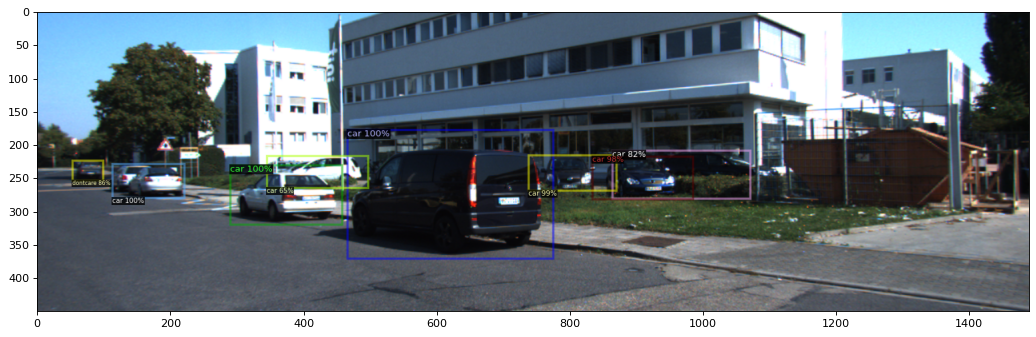

In [56]:
!(cd detectron2-ResNeSt/ && python3 tools/train_kitti.py \
  --config-file configs/kitti/kitti-faster-rcnn-resnest-50.yaml MODEL.WEIGHTS resnest_50.pth)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
img=mpimg.imread('detectron2-ResNeSt/prediction.png')
imgplot = plt.imshow(img)
plt.show()